<a href="https://colab.research.google.com/github/WajeehaAslam/computer_vision/blob/main/Create_video_using_multiple_images_using_OpenCV_with_all_tasks_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
from PIL import Image


In [4]:
!unzip "/content/Animals.zip"


Archive:  /content/Animals.zip
  inflating: Animals/bunny.jpg       
  inflating: Animals/cats.jpg        
  inflating: Animals/catss.jpg       
  inflating: Animals/dog.jpg         
  inflating: Animals/dogs.jpg        
  inflating: Animals/pandas.jpg      
  inflating: Animals/pen.jpg         
  inflating: Animals/penguins.jpg    
  inflating: Animals/rabbit.jpg      


In [6]:
path = "/content/Animals"
os.chdir(path)

mean_height = 0
mean_width = 0


In [7]:
num_of_images = len([file for file in os.listdir('.') if file.endswith((".jpg", ".jpeg", ".png"))])
print("Number of Images:", num_of_images)


Number of Images: 9


In [8]:
for file in os.listdir('.'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(os.path.join(path, file))
        width, height = im.size
        mean_width += width
        mean_height += height


In [9]:
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)


In [10]:
for file in os.listdir('.'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(os.path.join(path, file))
        # Use Image.LANCZOS instead of Image.ANTIALIAS for downsampling
        im_resized = im.resize((mean_width, mean_height), Image.LANCZOS)
        im_resized.save(file, 'JPEG', quality=95)
        print(f"{file} is resized")

catss.jpg is resized
bunny.jpg is resized
pandas.jpg is resized
rabbit.jpg is resized
pen.jpg is resized
dog.jpg is resized
penguins.jpg is resized
dogs.jpg is resized
cats.jpg is resized


In [11]:
# Function to generate video
def generate_video():
    image_folder = path
    video_name = 'mygeneratedvideo.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith((".jpg", ".jpeg", ".png"))]
    print("Images:", images)

    # Set frame from the first image
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    # Video writer to create .avi file
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))

    # Appending images to video
    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    # Release the video file
    video.release()
    cv2.destroyAllWindows()
    print("Video generated successfully!")

# Calling the function to generate the video
generate_video()

Images: ['catss.jpg', 'bunny.jpg', 'pandas.jpg', 'rabbit.jpg', 'pen.jpg', 'dog.jpg', 'penguins.jpg', 'dogs.jpg', 'cats.jpg']
Video generated successfully!


In [12]:
import cv2

video_path = "/content/Animals/mygeneratedvideo.avi"

cap = cv2.VideoCapture(video_path)

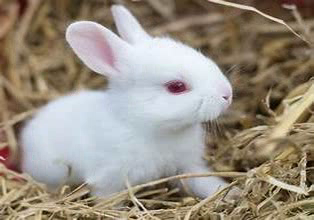

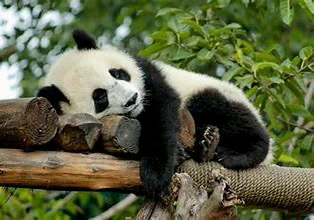

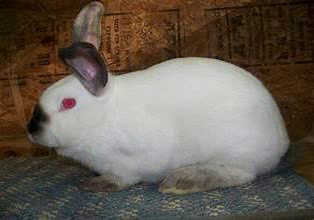

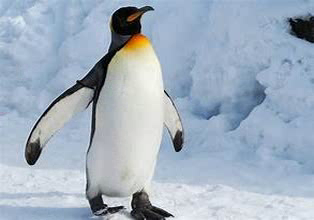

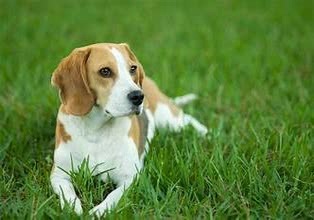

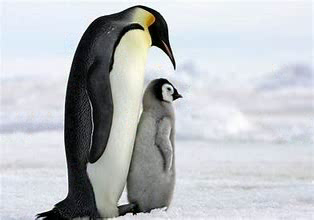

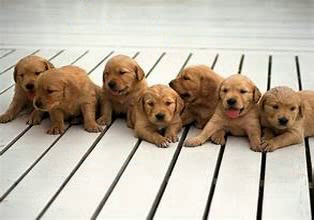

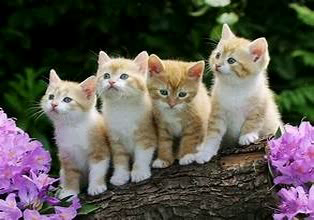

In [14]:
from google.colab.patches import cv2_imshow
while cap.isOpened():
  ret,frame = cap.read()
  if not ret:
    break

  cv2_imshow(frame)

  if cv2.waitKey(25) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()


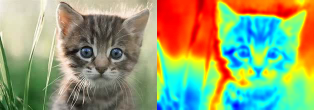

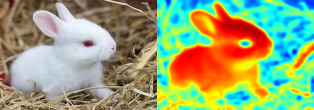

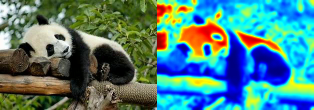

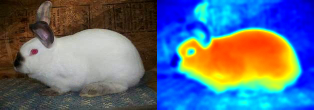

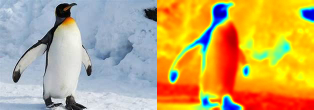

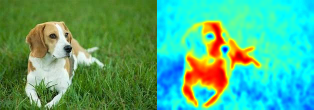

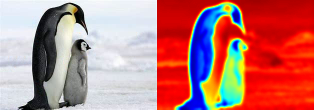

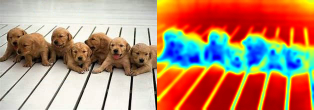

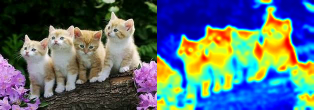

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# --- Load the video ---
video_path = "/content/Animals/mygeneratedvideo.avi"  # Replace with your video path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# --- Process video frames ---
while True:
    ret, frame = cap.read()
    if not ret:
        break  # End of video

    # --- Image Processing Techniques ---
    # 1. Resize (scale down to 50%)
    resized_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # 2. Blur (Gaussian Blur)
    blurred_frame = cv2.GaussianBlur(resized_frame, (7, 7), 0)

    # 3. Color Manipulation (convert to grayscale and apply a colormap)
    gray_frame = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2GRAY)
    color_mapped_frame = cv2.applyColorMap(gray_frame, cv2.COLORMAP_JET)

    # --- Combine original and processed frames side by side ---
    # Resize original frame to match processed frame size
    original_resized = cv2.resize(frame, (color_mapped_frame.shape[1], color_mapped_frame.shape[0]))
    combined_frame = np.hstack((original_resized, color_mapped_frame))

    # --- Display the result ---
    cv2_imshow(combined_frame)

    # Press 'q' to quit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# --- Release resources ---
cap.release()
cv2.destroyAllWindows()
